## Math 157: Intro to Mathematical Software
## UC San Diego, winter 2018

## February 12, 2018: Number theory and cryptography (part 1 of 3)

Administrivia:

- Homework 5 is now posted.
- Schedule change for this week: due to a schedule conflict, my office hours will take place Thursday 3-4 instead of 4-5.


The material we will be discussing this week is treated in far more detail in Math 187B (Mathematics of Modern Cryptography). Both 187B and its prerequisite Math 187A (Introduction to Cryptography) use CoCalc and Sage.

### Leftover from graph theory: minimum spanning trees

Since this week's problem set includes an example of a minimum spanning tree calculation, let me go over this once more in detail.

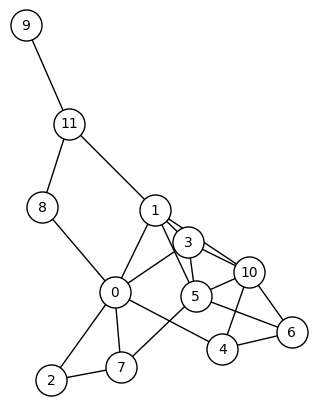

In [93]:
G = graphs.RandomGNP(12, .4); G.plot(talk=True)

Suppose (as in this case) that $G$ is connected.
A **spanning tree** is a subgraph of $G$ (i.e., the same vertices but possibly fewer edges) which is itself a tree, that is, it is connected with no loops.

In [94]:
H = G.random_spanning_tree(); show(H)

Let's see that this is indeed a tree by plotting it separately:

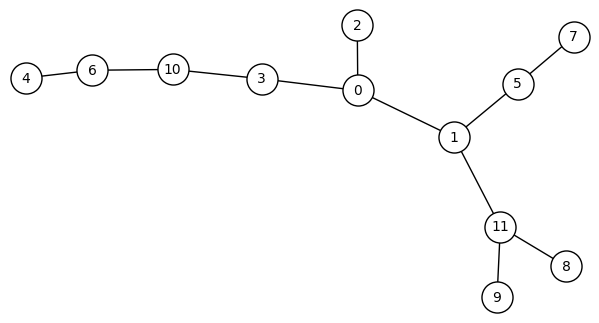

In [95]:
Graph(H).plot(talk = True)

Let's now plot it superimposed on top of the original graph:

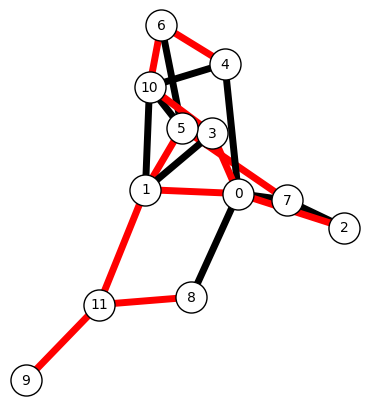

In [97]:
G.plot(talk = True, edge_colors = {'#FF0000': H}, edge_thickness=5)

There is a famous [formula](https://en.wikipedia.org/wiki/Kirchhoff%27s_theorem) for counting the spanning trees in a graph. This involves some linear algebra on the adjacency matrix!

In [98]:
G.spanning_trees_count()

14795

To talk about minimum spanning trees, we must assign a *weight* to each edge of the graph; the *weight* of a spanning tree is then the sum of the weights of the edges that are used in the tree, and the goal is to minimize this. This models the problem of finding a smaller network that still connects everything together while minimizing some measure of cost.

The minimum spanning tree function takes as an input a function to compute the edge of each weight. In some cases, it is natural to determine these weights in advance and use them as edge labels; but this is not obligatory.

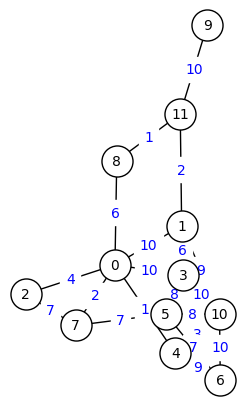

In [99]:
# Set some random edge weights, and use them as labels
for u,v,_ in G.edges(): # Note the structure of this for loop: 
                      # the entries of G.edges() are triples, and I am setting u and v using
                      # the first two members of each pair.
    G.set_edge_label(u, v, randint(1, 10))
G.plot(talk=True, edge_labels=True)

In [100]:
G.edges()

[(0, 1, 10),
 (0, 2, 4),
 (0, 3, 10),
 (0, 4, 1),
 (0, 7, 2),
 (0, 8, 6),
 (1, 3, 6),
 (1, 5, 8),
 (1, 10, 9),
 (1, 11, 2),
 (2, 7, 7),
 (3, 5, 8),
 (3, 10, 10),
 (4, 6, 9),
 (4, 10, 3),
 (5, 6, 7),
 (5, 7, 7),
 (5, 10, 8),
 (6, 10, 10),
 (8, 11, 1),
 (9, 11, 10)]

In [101]:
H = G.min_spanning_tree(weight_function=lambda e: e[2])
show(H)

In [102]:
G.weighted(new=True) # Consider G as a weighted graph, so that its labels are treated as edge weights by default.
H = G.min_spanning_tree() # No weight function needed now!
show(H)

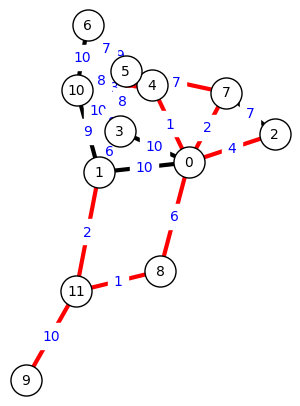

In [105]:
G.plot(talk = True, edge_labels=True, edge_colors = {'#FF0000': H}, edge_thickness=3)

On the problem set, you will be doing a similar calculation, except that the graph will be an example constructed from some real-life data. You will thus be using pandas to get the data into Sage.

And now for something completely different...

### Some number theory for cryptography

It is *very very easy* to compute the greatest common divisor of two integers, even very large ones, because of the [Euclidean algorithm](https://en.wikipedia.org/wiki/Euclidean_algorithm).

In [106]:
m = 2^300 + 23
n = 2^325 - 73
gcd(m,n)

1

The same technique can be used to find, given two integers $m$ and $n$, two other integers $a$ and $b$ such that $am+bn = \gcd(m,n)$. This is sometimes called the *extended Euclidean algorithm*, which helps explain the notation in Sage.

In [107]:
d,a,b = xgcd(m,n)

In [108]:
d

1

In [109]:
a,b

(8912264838355107109259232009923446053807867955608007127038327247724194309508961925753300183976782,
 -265606189917180154003478050527675332242484925854444716186473585597401687786250171832838663)

In [110]:
a*m+b*n

1

Oh, hmm, what was that command called again?

In [111]:
xkcd(1856)

Existence Proof Source: http://xkcd.com/1856

In [112]:
xgcd(1856, 2018)

(2, -436, 401)

These values can be used to make explicit the *Chinese remainder theorem*: if $\gcd(m,n) = 1$, then every system of equations of the form
$$
x \equiv x_1 \pmod{m}, \qquad x \equiv x_2 \pmod{n}
$$
has a solution $x \in \mathbb{Z}$ (which is unique up to adding a mulitple of $mn$).

In [113]:
x1 = 37
x2 = 265
x = x1*b*n + x2*a*m
print(x%m, x%n)

(37, 265)


By contrast, finding the prime factorization of a positive integer *can* be difficult. Not always, though.

In [114]:
factor(m) ## Takes a bit longer.

3 * 71 * 16428731586668563557701 * 582123405828207087405156630161072170828764652011657810830061815423

In [115]:
factor(n+2) ## But this one is easy!

3 * 1597 * 38149 * 373972150436294039317292792855084259263821049800740324243817706369726376887048555985496579

What makes the last example particularly easy is that you can test for the very small prime factors quickly (trial division), and then it turns out to be much easier to tell whether or not a big number is prime than to actually factor it. There are other features that make some numbers easier to factor than others, but more on this later.

### A reminder about modular exponentiation

One reason for this is that it is easy to do *modular exponentiation*, i.e., the remainder of a^b upon division by c. We have seen this story once before, so this will be a very quick recap.

How *not* to do this:

In [116]:
(2^m) % n ## No dice

RuntimeError: exponent must be at most 9223372036854775807

What does work:

In [117]:
mod(2,n)^m

9905086126956094233499195448340275387614834137875862846928339996679518341373478678353938460510230

In [118]:
power_mod(2, m, n)

9905086126956094233499195448340275387614834137875862846928339996679518341373478678353938460510230

In [0]:
## Or use pure python.
pow(2, m, n)

In [120]:
## Or do this in abstract-algebra style, by creating the ring of integers mod n and calculating there.
R = IntegerModRing(n)
R(2)^m

9905086126956094233499195448340275387614834137875862846928339996679518341373478678353938460510230

Remember that even working mod $n$, directly computing $2 \times ... \times 2$ with $m$ factors is not feasible. These computations all use
[repeated squaring](https://en.wikipedia.org/wiki/Exponentiation_by_squaring).

As I mentioned some time ago, Sage uses modular exponentation as a screening tool for primality by expoliting the *little Fermat theorem*: if $p$ is a prime number, then for any positive integer $a$, $a^p - a$ is divisible by $p$. (In the language of congruences, $a^p \equiv a \pmod{p}$.)

One possible proof (for the case $a=2$, but this can be extended to a general argument): in the binomial expansion
$$
(x+y)^p = x^p + \binom{p}{1} x^{p-1}y + \cdots + \binom{p}{p-1} xy^{p-1} + y^p
$$
all of the intermediate coefficients are divisible by $p$ (so plugging in $x=y=1$ gives the claim). For example...

In [121]:
P.<x,y> = PolynomialRing(ZZ) ## ZZ = the ring of integers
(x+y)^7

x^7 + 7*x^6*y + 21*x^5*y^2 + 35*x^4*y^3 + 35*x^3*y^4 + 21*x^2*y^5 + 7*x*y^6 + y^7

In [122]:
P.<x,y> = PolynomialRing(IntegerModRing(7))
(x+y)^7

x^7 + y^7

The contrapositive of the little Fermat theorem is: if $a^p-a$ is *not* divisible by $p$ for some $a$, then $p$ is *not* prime. This test works extremely well!

In [123]:
mod(2,m)^m

287232307696181918529284364822969746470277192886883388361201039121560050435826997842095303

In [124]:
mod(2,n)^n ## Couldn't factor it, but definitely not prime

46062872339940065393677818108700647013368935224453932258385083576658008611496018876986624343170833

In [125]:
is_prime(n) ## Uses this and some other methods

False

Again, we have seen that this test is not foolproof; it can return false positives for primality (e.g., [Carmichael numbers](https://en.wikipedia.org/wiki/Carmichael_number)).

In [126]:
mod(2,561)^561

2

In [127]:
mod(3,561)^561

3

In [0]:
mod(17, 561)^561

Consequently, this method cannot be used to certify that a particular number *is* prime, only that it is *not* prime. There are efficient algorithms that can certify primality, but they are somewhat harder to describe. One important one is the [Agrawal-Kayal-Saxena (AKS) algorithm](https://en.wikipedia.org/wiki/AKS_primality_test), which is both extremely simple *and* polynomial-time (though not as efficient in practice as some other methods). Kayal and Saxena were undergraduates at the time they discovered it (2002)!

One way to say this is that "prime numbers are easy to factor". The reason this is not an empty statement is because you have to know when to stop factoring!

In any case, the Fermat test is so effective that any number that passes it is *probably* prime, and this is sometimes good enough (though not for cryptography!).

In [128]:
for n in range(10^4):
    m = 10^500 + n
    if mod(2,m)^m == 2 and not is_prime(m): print m
print("no more examples found")

KeyboardInterrupt: 

The fact that prime numbers  are (relatively) easy to identify makes it possible to have functions like this:

In [129]:
next_prime(10^125) - 10^125

237

## Multiplicative order and primitive roots

Let $a,n$ be integers with $\gcd(a,n) = 1$. Using the extended Euclidean algorithm as above, one can find a multiplicative inverse of $a$ modulo $n$, i.e., a value $b$ such that $ab \equiv 1 \pmod{n}$. In fact, Sage will do this automatically.

In [130]:
a = 577
n = 6825
gcd(a,n)

1

In [131]:
mod(a,n)^(-1)

2413

In [132]:
~mod(a,n)

2413

In [133]:
1/mod(a,n)

2413

In [134]:
mod(1/a, n)

2413

In [135]:
## Or if you prefer abstract algebra syntax:
R = IntegerModRing(n)
R(a)^(-1)

2413

In [136]:
~R(a)

2413

In [137]:
R(1/a)

2413

As a consequence of the existence of the multiplicative inverse, there always exists a positive integer $d$ such that $a^d \equiv 1 \pmod{n}$. (There must be two powers that coincide mod $n$, and we can cancel the powers of $a$ from one side.)

If $n$ is prime, the little Fermat theorem implies that $d = n-1$ always works (although it need not be the smallest such value; more on this in a moment). For general $n$, there is a generalization of the Fermat theorem due to Euler: we have $a^{\phi(n)} \equiv 1 \pmod{n}$ where
$\phi(n)$ denotes the *Euler phi function* (or *totient function*): if $n$ has prime factorization $p_1^{e_1} \times p_2^{e_2} \times \cdots$, then
$$
\phi(n) = (p_1 - 1)p_1^{e_1-1}(p_2-1)p_2^{e_2-1} \cdots.
$$
For those who know group theory: recall that this works because the residue classes mod $n$ which have no common factor with $n$ form a group under multiplication, and $\phi(n)$ is its order.

In [138]:
factor(561)
euler_phi(561)

320

In [139]:
list(factor(561))

[(3, 1), (11, 1), (17, 1)]

In [140]:
for (d,e) in factor(561):
    print euler_phi(d), 560 % euler_phi(d) #Aha!

2 0
10 0
16 0


So now it makes sense to consider the *smallest* positive integer $d$ such that $a^d \equiv 1 \pmod{n}$. This integer must divide $\phi(n)$, otherwise the remainder of $\phi(n)$ mod $d$ would be an even smaller value. (Or use group theory!) This $d$ is called the *multiplicative order* of $d$ mod $n$.

In [141]:
for d in range(1, 17):
    print (d, multiplicative_order(mod(d,17)))

(1, 1)
(2, 8)
(3, 16)
(4, 4)
(5, 16)
(6, 16)
(7, 16)
(8, 8)
(9, 8)
(10, 16)
(11, 16)
(12, 16)
(13, 4)
(14, 16)
(15, 8)
(16, 2)


In [144]:
[mod(3,17)^i for i in range(16)]

[1, 3, 9, 10, 13, 5, 15, 11, 16, 14, 8, 7, 4, 12, 2, 6]

Important result: if $n$ is prime, then there is always at least one value of $a$ for which the multiplicative order of $a$ mod $n$ is equal to the maximum possible value $\phi(n) = n-1$. Any such $a$ is called a *primitive root* mod $n$. These play an important role in the use of *discrete logarithms* in cryptography.

(Abstract algebra interpretation; if $n$ is prime, then $(\ZZ/n\ZZ)^*$ is a cyclic group!)

In [145]:
u = mod(3, 17)
u.is_primitive_root()

True

In [146]:
u = mod(3,17)
v = mod(14, 17)
v.log(u)

9